# yFinance
Links for References used for this excercise: 
1. https://github.com/ranaroussi/yfinance
2. https://www.geeksforgeeks.org/python/multithreaded-download-of-yahoo-stock-history-with-python-yfinance/
3. For handling dates and time: 
    *  https://docs.python.org/3/library/datetime.html for calling date and time info
    *  https://stackoverflow.com/questions/32490629/getting-todays-date-in-yyyy-mm-dd-in-python for formatting the date info 
    *  https://www.geeksforgeeks.org/python/python-datetime-strptime-function/ for strptime changing Date and time into a string to be used in the filename
4. Saving dataframe to csv files https://www.datacamp.com/tutorial/save-as-csv-pandas-dataframe
5. Info about saving files into different directories in codespaces https://docs.github.com/en/codespaces/about-codespaces/deep-dive
6. Translate function for stripping out multiple characters from string filename https://www.geeksforgeeks.org/python/python-replace-multiple-characters-at-once/

## Problem 1: Data from yFinance

In [319]:
# import required modules 
import yfinance as yf
import time
import datetime as dt
import pandas as pd
from pathlib import Path
import os
import matplotlib.pyplot as plt

In [320]:
# define program start time and dates for use in calculations 
start= time.time()
today = datetime.date.today()
yesterday = today - datetime.timedelta(days=1)
fivedaysago = today - datetime.timedelta(days=5)

# Convert dates to string type data as is required by the yf.download function
strtoday = str(today)
strfivedaysago =str(fivedaysago)

#Checking the formats of the dates are correct
    #print (type(strtoday))
    #print (type(strfivedaysago))
print (f"Today's date is ",today)
print (f"Five days ago was ",fivedaysago)

Today's date is  2025-12-17
Five days ago was  2025-12-12


In [321]:
# Define a list of stocks to track
ticker_list =['META','AAPL','AMZN','NFLX','GOOG']

# Define path to root file
datadir = "./data/"# Problem 1: Data from yfinance


In [322]:
# Combine the functions in one function called get_data() to download data from yfinance

def get_data():
    # Execute the yf.download operation and populating the data into a dataframe.  
    data =yf.download( 
        start= strfivedaysago,
        end= strtoday,
        interval= '15m',
        tickers = ticker_list,
        threads=True,
        group_by='ticker',
        auto_adjust = True,
        )
    return data




#call the function to get the data
data = get_data()



[*********************100%***********************]  5 of 5 completed


In [323]:
# View the index
#data.index

In [338]:
# view the data
#data

In [ ]:
# Get date and time information for file name into the correct format
now = datetime.datetime.now()
filename = now.strftime("%Y%m%d-%H%M%S")

#print (filename)

20251217-003323


In [326]:
# display the datadir
print (f"path is ", datadir)

# Write data to csv file. 
data.to_csv(datadir+filename+".csv", sep=',')

path is  ./data/


In [327]:
# This segment allows for monitoring the time taken to complete the execution of the program. 
print ('The program takes ', time.time()-start,'seconds.')

The program takes  0.36458253860473633 seconds.


## Problem 2: Plotting Data

In [328]:
# define the prices tuple
prices = ('Open', 'High', 'Low', 'Close', 'Volume')

In [329]:
# Problem 2: Plotting Data
# https://stackoverflow.com/questions/43074685/find-file-in-directory-with-the-highest-number-in-the-filename for filename with highest number, as this will be the latest created file

# List all files in the directory data 
list_of_files = os.listdir(datadir)

#sort the list to display the newest file in sorted order
list_of_files.sort(reverse = True)

#show this list
list_of_files

['20251217-003323.csv',
 '20251217-001225.csv',
 '20251217-001054.csv',
 '20251217-000929.csv',
 '20251217-000457.csv',
 '20251216-235650.csv',
 '20251216-235627.csv',
 '20251216-235408.csv',
 '20251216-233303.csv',
 '20251216-232626.csv',
 '20251216-232251.csv',
 '20251216-232242.csv',
 '20251216-223035.csv',
 '20251216-221858.csv',
 '20251207-235309.csv',
 '20251207-235150.csv',
 '20251207-235120.csv',
 '20251207 233754.csv',
 '20251207 230315.csv',
 '20251207 230227.csv',
 '20251207 230146.csv',
 '20251207 230134.csv',
 '20251207 225354.csv',
 '20251207 224213.csv',
 '20251207 224142.csv',
 '20251207 222436.csv',
 '20251207 222244.csv',
 '20251207 222059.csv',
 '20251207 220622.csv',
 '20251207 220332.csv',
 '20251207 220307.csv',
 '20251207 220132.csv',
 '20251207 215510.csv',
 '20251207 214855.csv',
 '20251207 214845.csv',
 '20251207 213858.csv',
 '20251207 213657.csv',
 '20251207 212741.csv',
 '20251206 215647.csv',
 '20251126 211628.csv',
 '20251011 125240.csv',
 '20251010 22123

In [330]:
# show the latest file
#list_of_files[0]

In [331]:
# assign a variable name to the file selected as the latest file 
recent_file = list_of_files[0]
print(recent_file)

20251217-003323.csv


In [332]:
# create a dataframe from the file selected as most recent
df = pd.read_csv(f'./data/{list_of_files[0]}', header=[0, 1], index_col=0)

In [333]:
#remove errors from dataframe
df.dropna(inplace=True)
# show the dataframe
df

Ticker                           AAPL                                      \
Price                            Open        High         Low       Close   
Datetime                                                                    
2025-12-12 14:30:00+00:00  277.795013  279.190796  276.820007  278.609985   
2025-12-12 14:45:00+00:00  278.609985  279.220001  278.019989  278.954987   
2025-12-12 15:00:00+00:00  278.940002  279.159912  278.359192  278.630005   
2025-12-12 15:15:00+00:00  278.649994  278.705109  277.820007  277.869995   
2025-12-12 15:30:00+00:00  277.880005  278.859985  277.540009  278.559998   
...                               ...         ...         ...         ...   
2025-12-16 19:45:00+00:00  274.029999  274.420013  273.880005  274.119995   
2025-12-16 20:00:00+00:00  274.089996  274.649994  274.019989  274.339996   
2025-12-16 20:15:00+00:00  274.339996  274.799988  274.339996  274.559998   
2025-12-16 20:30:00+00:00  274.549988  275.355011  274.540009  275.135010   
2025-12-16 20:45:00+00:00  275.140015  275.500000  274.450012  274.470001   

Ticker                                    GOOG                          \
Price                       Volume        Open        High         Low   
Datetime                                                                 
2025-12-12 14:30:00+00:00  1662056  314.809998  316.130005  312.654999   
2025-12-12 14:45:00+00:00   703150  312.889404  313.500000  312.239990   
2025-12-12 15:00:00+00:00   720536  313.454987  313.575012  311.750000   
2025-12-12 15:15:00+00:00   821586  311.929993  312.364014  309.433014   
2025-12-12 15:30:00+00:00   922417  309.609985  310.579987  309.220001   
...                            ...         ...         ...         ...   
2025-12-16 19:45:00+00:00   480825  306.209991  306.456604  305.933105   
2025-12-16 20:00:00+00:00   473499  306.390015  306.932892  306.290009   
2025-12-16 20:15:00+00:00   504621  306.350006  307.059998  306.299988   
2025-12-16 20:30:00+00:00   674084  307.010010  307.739990  307.010010   
2025-12-16 20:45:00+00:00  1687763  307.489990  308.190002  307.119995   

Ticker                                          ...        META              \
Price                           Close   Volume  ...        Open        High   
Datetime                                        ...                           
2025-12-12 14:30:00+00:00  312.869995  1608307  ...  650.210022  652.010010   
2025-12-12 14:45:00+00:00  313.412415   535879  ...  647.729980  650.210022   
2025-12-12 15:00:00+00:00  311.935211   417443  ...  650.239990  650.400024   
2025-12-12 15:15:00+00:00  309.589996   572012  ...  647.950012  648.289917   
2025-12-12 15:30:00+00:00  310.480011   561458  ...  643.929993  646.750000   
...                               ...      ...  ...         ...         ...   
2025-12-16 19:45:00+00:00  306.377502   186421  ...  657.099976  658.590027   
2025-12-16 20:00:00+00:00  306.320007   272362  ...  658.030029  658.989990   
2025-12-16 20:15:00+00:00  307.019989   273932  ...  658.809998  659.200012   
2025-12-16 20:30:00+00:00  307.470001   358666  ...  658.844971  661.900024   
2025-12-16 20:45:00+00:00  307.579987  1097182  ...  661.380005  662.520020   

Ticker                                                           NFLX  \
Price                             Low       Close   Volume       Open   
Datetime                                                                
2025-12-12 14:30:00+00:00  646.770020  647.734985   798116  95.504997   
2025-12-12 14:45:00+00:00  646.500000  650.200012   468171  96.764999   
2025-12-12 15:00:00+00:00  647.580017  648.080017   291331  96.404999   
2025-12-12 15:15:00+00:00  643.849976  644.010010   310962  96.375000   
2025-12-12 15:30:00+00:00  643.310120  646.630005   304027  95.542000   
...                               ...         ...      ...        ...   
2025-12-16 19:45:00+00:00  657.000000  658.119995   295059  94.364998   
2025-12-16 20:00:00+00:00  657.280029  658.7349

In [334]:
# convert the datetime to string format
df.index = pd.to_datetime(df.index)
df.index = df.index.strftime('%Y-%m-%d %H:%M:%S')

# view the dataframe
df

Ticker                     AAPL                                               \
Price                      Open        High         Low       Close   Volume   
Datetime                                                                       
2025-12-12 14:30:00  277.795013  279.190796  276.820007  278.609985  1662056   
2025-12-12 14:45:00  278.609985  279.220001  278.019989  278.954987   703150   
2025-12-12 15:00:00  278.940002  279.159912  278.359192  278.630005   720536   
2025-12-12 15:15:00  278.649994  278.705109  277.820007  277.869995   821586   
2025-12-12 15:30:00  277.880005  278.859985  277.540009  278.559998   922417   
...                         ...         ...         ...         ...      ...   
2025-12-16 19:45:00  274.029999  274.420013  273.880005  274.119995   480825   
2025-12-16 20:00:00  274.089996  274.649994  274.019989  274.339996   473499   
2025-12-16 20:15:00  274.339996  274.799988  274.339996  274.559998   504621   
2025-12-16 20:30:00  274.549988  275.355011  274.540009  275.135010   674084   
2025-12-16 20:45:00  275.140015  275.500000  274.450012  274.470001  1687763   

Ticker                     GOOG                                               \
Price                      Open        High         Low       Close   Volume   
Datetime                                                                       
2025-12-12 14:30:00  314.809998  316.130005  312.654999  312.869995  1608307   
2025-12-12 14:45:00  312.889404  313.500000  312.239990  313.412415   535879   
2025-12-12 15:00:00  313.454987  313.575012  311.750000  311.935211   417443   
2025-12-12 15:15:00  311.929993  312.364014  309.433014  309.589996   572012   
2025-12-12 15:30:00  309.609985  310.579987  309.220001  310.480011   561458   
...                         ...         ...         ...         ...      ...   
2025-12-16 19:45:00  306.209991  306.456604  305.933105  306.377502   186421   
2025-12-16 20:00:00  306.390015  306.932892  306.290009  306.320007   272362   
2025-12-16 20:15:00  306.350006  307.059998  306.299988  307.019989   273932   
2025-12-16 20:30:00  307.010010  307.739990  307.010010  307.470001   358666   
2025-12-16 20:45:00  307.489990  308.190002  307.119995  307.579987  1097182   

Ticker               ...        META                                      \
Price                ...        Open        High         Low       Close   
Datetime             ...                                                   
2025-12-12 14:30:00  ...  650.210022  652.010010  646.770020  647.734985   
2025-12-12 14:45:00  ...  647.729980  650.210022  646.500000  650.200012   
2025-12-12 15:00:00  ...  650.239990  650.400024  647.580017  648.080017   
2025-12-12 15:15:00  ...  647.950012  648.289917  643.849976  644.010010   
2025-12-12 15:30:00  ...  643.929993  646.750000  643.310120  646.630005   
...                  ...         ...         ...         ...         ...   
2025-12-16 19:45:00  ...  657.099976  658.590027  657.000000  658.119995   
2025-12-16 20:00:00  ...  658.030029  658.989990  657.280029  658.734985   
2025-12-16 20:15:00  ...  658.809998  659.200012  658.200012  658.859985   
2025-12-16 20:30:00  ...  658.844971  661.900024  658.763123  661.349976   
2025-12-16 20:45:00  ...  661.380005  662.520020  657.109985  657.159973   

Ticker                             NFLX                                   \
Price                 Volume       Open       High        Low      Close   
Datetime                                                                   
2025-12-12 14:30:00   798116  95.504997  96.919998  95.050003  96.760201   
2025-12-12 14:45:00   468171  96.764999  96.775002  95.930000  96.400398   
2025-12-12 15:00:00   291331  96.404999  96.660004  95.910004  96.385002   
2025-12-12 15:15:00   310962  96.375000  96.489998  95.529999  95.540001   
2025-12-12 15:30:00   304027  95.542000  96.070000  95.459999  95.764999   
...                      ...        ...        ...        ...        ...   
2025-12-1

In [335]:
# plot a graph of the closing prices for each stock for each day
# create a new dataframe for the closing prices
close_df = pd.DataFrame()
for ticker in ticker_list:
    close_df[ticker] = df[ticker]['Close']

#print the dataframe of closing prices
print (close_df)

                           META        AAPL        AMZN       NFLX        GOOG
Datetime                                                                      
2025-12-12 14:30:00  647.734985  278.609985  228.240005  96.760201  312.869995
2025-12-12 14:45:00  650.200012  278.954987  228.410004  96.400398  313.412415
2025-12-12 15:00:00  648.080017  278.630005  227.219803  96.385002  311.935211
2025-12-12 15:15:00  644.010010  277.869995  226.380005  95.540001  309.589996
2025-12-12 15:30:00  646.630005  278.559998  227.419998  95.764999  310.480011
...                         ...         ...         ...        ...         ...
2025-12-16 19:45:00  658.119995  274.119995  222.380005  94.214996  306.377502
2025-12-16 20:00:00  658.734985  274.339996  222.328796  94.245003  306.320007
2025-12-16 20:15:00  658.859985  274.559998  222.649200  94.445000  307.019989
2025-12-16 20:30:00  661.349976  275.135010  223.045593  94.487000  307.470001
2025-12-16 20:45:00  657.159973  274.470001  222.529

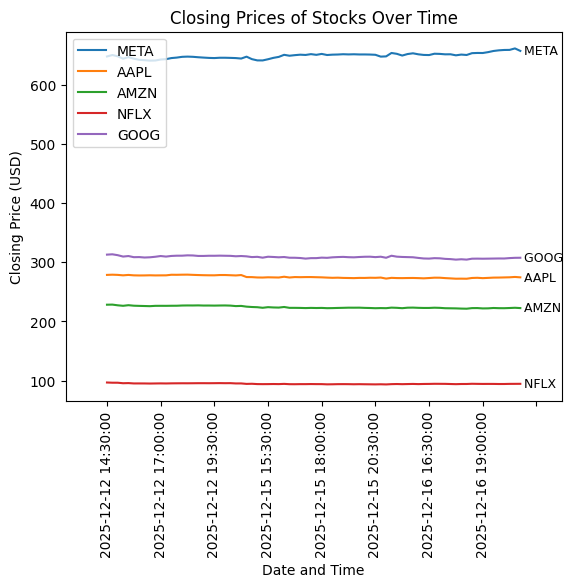

In [336]:
#plot the data on a graph
ax = matplotlib.pyplot.gca()
close_df.plot( ax = ax )
plt.xticks(rotation=90)
plt.xlabel('Date and Time')
plt.ylabel('Closing Price (USD)')
plt.title('Closing Prices of Stocks Over Time')
plt.margins(x=0.1)
#plt.legend(title='Stocks')

# plot datalabels on each line in linechart
for line in ax.get_lines():
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    label = line.get_label()
    plt.text(x, y, f' {label}', fontsize=9, verticalalignment='center')

#save the chart as a png file
plt.savefig('closing_prices_chart.png', bbox_inches='tight')

plt.show()

In [337]:


df1 = df[df['Ticker'] == unique_stock[0]] #Netflix
df2 = df[df['Ticker'] == unique_stock[1]] #Apple
df3 = df[df['Ticker'] == unique_stock[2]] #Amazon
df4 = df[df['Ticker'] == unique_stock[3]] #Meta
df5 = df[df['Ticker'] == unique_stock[4]] #Google

# print each individual stock
print (df1)
print (df2)
print (df3)
print (df4)
print (df5)


#date = yesterday
#print (date)

#plot
ax = matplotlib.pyplot.gca()
df.plot( x = '2025-10-09', y=['NFLX', 'AAPL', 'AMZN', 'META', 'GOOG'] , ax = ax )


KeyError: 'Ticker'

In [ ]:
# define a plot for the closing price over the last 5 days
#ax=close_df.plot(kind = 'line', x = '2025-10-09', y = 'NFLX', marker = '.', c = 'red' , label = 'Netflix')
#pt.show()

# Create the plot_data() function
#def plot_data():
    #function goes here.
    #gibberish

#plot_data()

## End